<a href="https://colab.research.google.com/github/erfanyeganegi/Linear-Regression-Non-Linear-Transformations/blob/master/01_Linear_Regression_(Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x: np.ndarray, m: float, b: float):
  return m * x + b

In [3]:
X = np.linspace(-10, 10, 100, endpoint=True)
np.random.shuffle(X)

y = (2*X + 5) + (10 * (np.random.random(size=X.shape[0]) - 0.5))

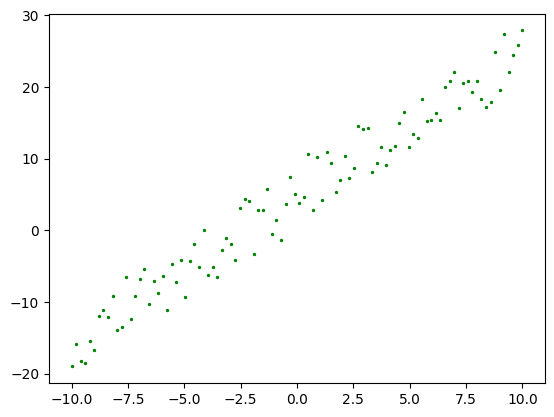

In [4]:
plt.scatter(X, y, s=2, c='g')

In [5]:
split_size = int(0.8 * len(X))

X_Train, y_Train = X[:split_size], y[:split_size]
X_Test, y_Test = X[split_size:], y[split_size:]

In [6]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((80,), (80,), (20,), (20,))

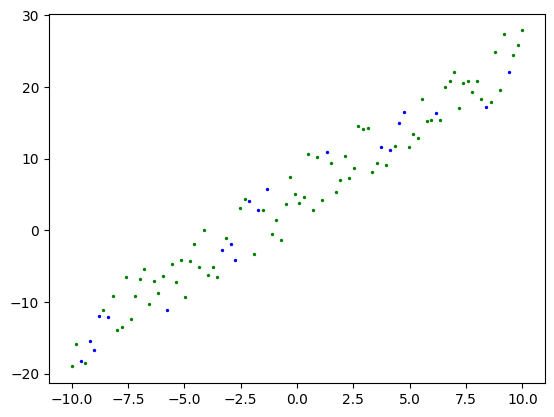

In [7]:
plt.scatter(X_Train, y_Train, s=2, c='g')
plt.scatter(X_Test, y_Test, s=2, c='b')

In [8]:
def loss_function(X, y, m, b):
  return np.mean(((f(X, m, b) - y) ** 2))

def loss_function_gradient(X, y, m, b):
  m_grad = 2 * np.mean((f(X, m, b) - y) * X)
  b_grad = 2 * np.mean(f(X, m, b) - y)

  return m_grad, b_grad

loss_function(X, y, 2, 5)

7.1408935001955625

In [9]:
def perform_gradient_descent(X, y, m, b, lr=0.01):
  m_grad, b_grad = loss_function_gradient(X, y, m, b)

  m = m - lr * m_grad
  b = b - lr * b_grad

  return m, b

In [10]:
m, b = np.random.random(), np.random.random()

MAX_ITERATIONS = 500

iterations = [0]
Train_loss_history = [loss_function(X_Train, y_Train, m, b)]
Test_loss_history = [loss_function(X_Test, y_Test, m, b)]

for i in range(MAX_ITERATIONS):
  m, b = perform_gradient_descent(X_Train, y_Train, m, b)

  Train_loss = loss_function(X_Train, y_Train, m, b)
  Test_loss = loss_function(X_Test, y_Test, m, b)

  iterations.append(i)
  Train_loss_history.append(Train_loss)
  Test_loss_history.append(Test_loss)

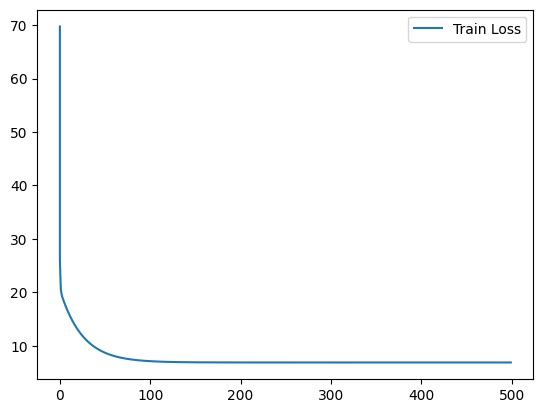

In [11]:
plt.plot(iterations, Train_loss_history, label="Train Loss")
plt.legend()

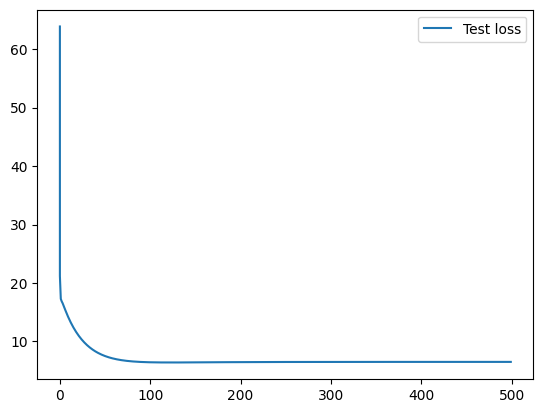

In [12]:
plt.plot(iterations, Test_loss_history, label="Test loss")
plt.legend()

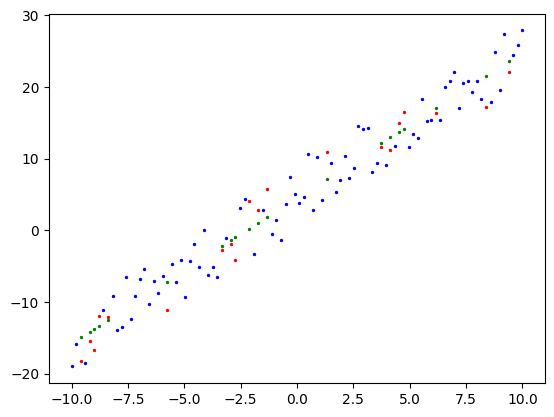

In [13]:
plt.scatter(X_Train, y_Train, s=2, c='b')
plt.scatter(X_Test, y_Test, s=2, c='r')
plt.scatter(X_Test, f(X_Test, m, b), s=2, c='g')

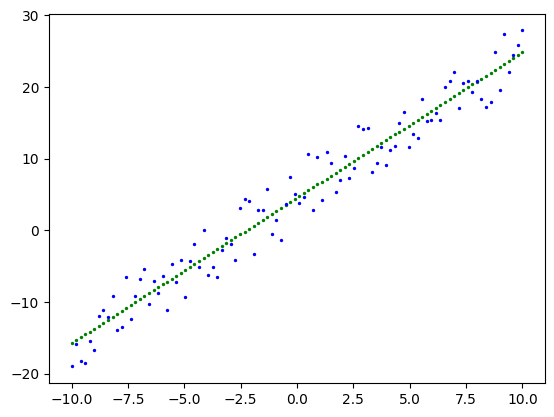

In [14]:
plt.scatter(X, f(X, m, b), s=2, c='g')
plt.scatter(X, y, s=2, c='b')

In [15]:
m, b

(2.0311463222477473, 4.534371050445838)